In [1]:
import xgboost
from pandas import read_csv
#from matplotlib import pyplot
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from numpy import asarray
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


from xgboost import plot_tree
import matplotlib.pyplot as plt
import graphviz


from numpy.random import seed
seed(8)
#from xgboost import XGBRegressor
print(xgboost.__version__)

1.5.0


In [2]:
########### My Research ########################
#x = pd.read_csv("C:/Users/DI BO/OneDrive - University of Tennessee/R/mydata3.csv")
#x = pd.read_csv("C:/Users/User/OneDrive - University of Tennessee/R/mydata3.csv")
x = pd.read_csv("C:/Users/dbo/OneDrive - University of Tennessee/R/mydata3.csv")
x = x[:200]
#y = pd.read_csv("C:/Users/DI BO/OneDrive - University of Tennessee/R/y3.csv")
y = pd.read_csv("C:/Users/dbo/OneDrive - University of Tennessee/R/y3.csv")
#y = pd.read_csv("C:/Users/User/OneDrive - University of Tennessee/R/y3.csv")
y = y[:200]

print(x.shape);print(y.shape)

(200, 41)
(200, 1)


<class 'list'>
<class 'list'>
<class 'list'>
[[-0.6931911  -0.43395379 -0.59752027 -0.69880114 -0.18396619  1.75305358
  -1.6163934  -1.72212769 -0.49276261  0.41031046 -0.35181788 -0.41891846
  -1.57159651 -1.56437494 -1.09706611  0.19299998  0.125375   -0.3004153
  -1.26239503  1.66094505  0.84581738  0.11654563 -0.85763691  0.2814246
   1.61781371 -1.0301082  -1.29251547 -1.12363256  0.86878973  1.21978578
  -1.27685753 -0.95838312 -0.61497529 -0.18918075 -0.49935853 -1.60010454
   1.14412536 -0.04940838  0.58918853  1.30441789 -0.73733354]]
[[ 0.87711027  0.19359493  1.08126785 -0.31025059 -0.21856569  1.82679407
  -1.17502651 -1.28176841 -1.38189815 -1.03515197  0.81516537 -0.0062544
   1.81191407 -0.10674187 -0.42104974  0.8444757  -0.63784258 -1.42032955
   0.23725977 -0.99790854  0.69818843 -0.76207722  0.6985193  -0.45213379
   0.69275046  1.58500448  1.55671324 -1.16557036 -1.41623054  0.17469656
   1.1035526   0.64744131 -0.61589929 -0.94965108  0.82128517 -0.81811582
  -1.3

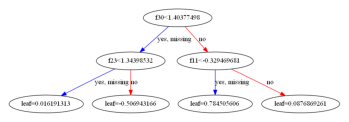

12.36547419401032
<class 'list'>
<class 'list'>
<class 'list'>
[[ 0.95327349  0.08296093  0.93963422 -0.34246837 -0.24575494  1.84713139
  -1.01412241 -1.3242219  -1.24422877 -0.95414119  1.02001295  0.15883536
   1.72454491 -0.03992977 -0.55651522  0.8639492  -0.5621581  -1.11620402
   0.21917236 -1.0384451   0.80281836 -0.53705442  0.55514743 -0.65017603
   0.53144304  1.759543    1.7034043  -1.35107096 -1.32240094  0.11330805
   1.32562766  0.47238638 -0.58901668 -1.06411845  0.72402008 -0.82251968
  -1.41251508 -0.35021038 -0.30676308 -0.78586352  1.09005507]]
[[-0.77837948 -0.54294926 -0.4363403  -0.7786298  -0.22704607  1.57506554
  -1.33273295 -1.8914634  -0.47065191  0.20151587 -0.52681219 -0.54646551
  -1.45980796 -1.40956944 -1.02756788  0.04650613  0.05675933 -0.52343202
  -1.16710289  1.71279437  0.87183847  0.09416247 -0.66871112  0.5182174
   1.57699894 -0.98276578 -1.61284781 -1.10520865  0.75261153  1.22566899
  -1.459986   -1.18032389 -0.37573337 -0.32678748 -0.2971856

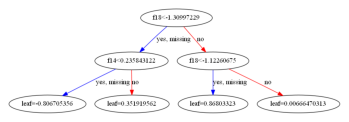

11.377081766009168
<class 'list'>
<class 'list'>
<class 'list'>
[[ 0.98805253  0.07226443  0.92532659 -0.37063987 -0.28814617  1.76948796
  -0.9539792  -1.38658662 -1.24431873 -0.99846012  0.98453346  0.04728428
   1.71804186 -0.03914393 -0.50613768  0.8030242  -0.54689698 -1.21126404
   0.26100054 -0.99669264  0.79482005 -0.60126681  0.59937686 -0.5366968
   0.50417218  1.69776954  1.70072018 -1.38721131 -1.26011857  0.05045369
   1.23960701  0.3626169  -0.48911251 -1.11581607  0.74899355 -0.77434502
  -1.45358226 -0.2849568  -0.27282668 -0.65934219  1.08166398]]
[[-0.56221458 -1.54509717  1.1755877  -1.41097255  0.05906638 -1.30679987
   0.18332123 -0.48684427 -0.23233128 -0.41743288  0.48096617 -1.34947106
   0.64739873  0.78597024  1.39163506  0.28161818  1.55311377  1.14944333
  -0.68918897 -1.25112482 -1.00536563 -1.59888301  0.48291405 -0.35255566
  -0.69150322 -0.55341721  0.36219726 -0.58958656  1.69216121  1.8197185
  -1.21289505 -0.45872171 -0.14491633  0.33656072 -1.2337406

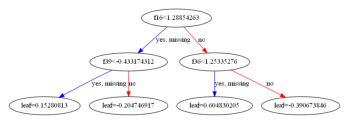

12.70982864697884
<class 'list'>
<class 'list'>
<class 'list'>
[[ 0.86681371  0.05528319  1.03896791 -0.34916828 -0.22652284  1.74916521
  -0.87786994 -1.41700352 -1.27111881 -1.09125441  1.02106223  0.17454698
   1.78064568 -0.00993789 -0.54688984  0.77695337 -0.63581795 -1.16650492
   0.22495567 -1.0164174   0.8189476  -0.50724902  0.66414952 -0.51207139
   0.57831234  1.77368272  1.65041954 -1.32440458 -1.34292545  0.20380082
   1.22835642  0.39741191 -0.54730103 -1.12769654  0.84806447 -0.73567232
  -1.38323021 -0.27600305 -0.24171498 -0.72911194  1.06916682]]
[[ 0.93788529 -1.1686838   1.04662121  0.2049265  -0.19423411  2.00032202
  -0.97332514 -0.04115791  0.86468501  0.96133534  0.51009445 -1.61124623
  -0.01463046  0.54143747 -0.81444021 -0.28814801  0.89893677  0.2983415
  -0.87938924 -1.61307247  1.1690461  -0.26685396 -1.98178529 -0.31055755
   0.28789537 -1.34711699 -0.95038935  0.45403475 -1.63993142  0.49026837
  -1.4161157   0.22292964 -0.06673517  0.67301336  0.8089223

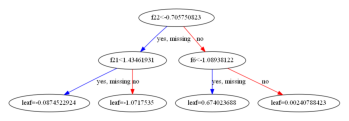

14.190807186468609
<class 'list'>
<class 'list'>
<class 'list'>
[[ 0.89026561  0.08638944  0.98684286 -0.31346298 -0.26509461  1.81807769
  -0.86892467 -1.29693675 -1.19135703 -1.0198915   1.03473183  0.14747909
   1.78026051 -0.02226551 -0.57486895  0.86884255 -0.64059896 -1.20645474
   0.31646721 -1.03500382  0.81430233 -0.56597699  0.62879826 -0.58566975
   0.53510057  1.69143762  1.80381408 -1.31106601 -1.36767297  0.14565426
   1.18386515  0.39371479 -0.4783783  -1.05088112  0.7908512  -0.77522956
  -1.37592047 -0.31354103 -0.26813118 -0.69282682  1.07604553]]
[[-1.65627059 -1.20610321 -0.34395748 -0.5775346  -0.80527407 -1.14225255
  -1.82662691  0.17773336 -0.39126624 -0.6421276  -0.6751052   0.67438307
   0.46244453  0.32861996  0.25613938  1.27117226  0.52611997  1.62933366
  -0.34895893 -0.17658742  1.11254831  0.28110558  0.5870682  -1.551918
  -1.3021438   1.22417504  0.76108287  0.93576096  1.77512397 -0.80901396
  -1.06783383 -0.25133926  1.15512957  0.84218602  0.7470308

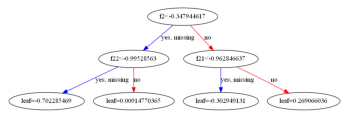

13.289921714727463
[12.36547419401032, 11.377081766009168, 12.70982864697884, 14.190807186468609, 13.289921714727463]
Mean RMSE: 12.78662270163888
sd2 of RMSE: 0.9375620518704082
optimal hyperparameter [{'eta': 0.3, 'gamma': 5, 'max_depth': 2, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 1}, {'eta': 0.3, 'gamma': 5, 'max_depth': 2, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 1}, {'eta': 0.3, 'gamma': 5, 'max_depth': 2, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 1}, {'eta': 0.3, 'gamma': 10, 'max_depth': 2, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 1}, {'eta': 0.3, 'gamma': 10, 'max_depth': 2, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 1}]


In [3]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

optimalparalist = []
rmselist = []
# Grid Search
space = dict()
space['n_estimators'] = [100]
space['max_depth'] = [2,3]
#space['eta'] =[0.01,0.1,0.3]
space['eta'] =[0.3,0.6]
space['subsample'] =[1]
space['min_child_weight'] =[1,5]
space['gamma'] = [5,10]
#alpha
#lamda


##Same data in R
allcols = [141, 67, 166, 128, 161, 42, 13, 186, 50, 84, 20, 105, 181, 73, 6, 72, 78, 36, 104, 109, 164, 33, 188, 125, 88, 171, 32, 83, 162, 69, 192, 41, 165, 110, 147, 155, 19, 43, 120, 86, 170, 195, 39, 24, 118, 121, 38, 168, 133, 23, 193, 129, 44, 145, 21, 114, 103, 159, 142, 143, 102, 74, 12, 157, 175, 22, 180, 172, 139, 28, 107, 47, 173, 167, 189, 30, 101, 16, 184, 131, 160, 82, 117, 113, 89, 196, 106, 63, 93, 177, 95, 158, 59, 191, 92, 178, 9, 0, 194, 58, 25, 14, 57, 130, 150, 152, 144, 75, 153, 151, 52, 85, 136, 179, 34, 123, 108, 96, 77, 146, 199, 27, 182, 60, 45, 66, 70, 116, 174, 48, 148, 55, 169, 49, 185, 163, 56, 90, 154, 115, 15, 18, 35, 1, 111, 132, 71, 91, 40, 137, 99, 187, 112, 100, 122, 198, 10, 124, 135, 94, 46, 53, 79, 8, 183, 62, 140, 98, 2, 4, 156, 190, 65, 119, 11, 149, 5, 64, 37, 127, 68, 54, 31, 81, 51, 87, 3, 26, 197, 76, 61, 7, 29, 176, 97, 126, 80, 138, 17, 134]

len(allcols)

# Split data
for i in range(1,6):
    testcol = allcols[(i-1)*40: i*40]
    print(type(allcols));print(type(allcols[(i-1)*40: i*40]));print(type(testcol))
    traincol = allcols[0:(i-1)*40] +allcols[i*40: len(allcols)]  
    #print(testcol)
    #print(traincol)
    
    X_train = x.loc[traincol,].values
    X_test = x.loc[testcol,].values
    y_train = y.loc[traincol,].values
    y_test = y.loc[testcol,].values
    
    # transform data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    print(X_train[0:1]);print(X_test[0:1]);print(y_train[0:1])
    #print(type(X_train))


    
    
    ## XGBoost model and Hyperparameter Selection via Grid Search
    model = XGBRegressor()
    cv_inner = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    search = GridSearchCV(model, space, scoring='neg_root_mean_squared_error', n_jobs=4, cv=cv_inner)
    result = search.fit(X_train, y_train)
    # summarize result
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)
    optimalparalist.append(result.best_params_)
    
    xgbbest = XGBRegressor(gamma= result.best_params_['gamma'], min_child_weight = result.best_params_['min_child_weight'],\
                           eta = result.best_params_['eta'], max_depth = result.best_params_['max_depth'], \
                           n_estimators= result.best_params_['n_estimators'], subsample= result.best_params_['subsample'])
    #xgbbest.fit(X_train, y_train.values.ravel())
    xgbbest.fit(X_train, y_train)
    
    
    plot_tree(xgbbest, num_trees=50,feature_names=list(x.columns))
    plt.show()
    #xgbbest.get_booster().dump_model("out.txt")
    #xgbbest.get_booster().dump_model("out[i].txt")
    #xgbbest.get_booster().trees_to_dataframe()

    
    #treestructure = tree.export_text(xgbbest)
    #print(treestructure)

    y_pred = xgbbest.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    print(rmse)
    rmselist.append(rmse)

## Final results ####    
print(rmselist)
mean_rmse = sum(rmselist)/len(rmselist)
print("Mean RMSE:", mean_rmse)
#import statistics
#res = statistics.pstdev(rmselist)
#print("sd of RMSE:",res)

variance_rmse = sum([((j - mean_rmse)**2) for j in rmselist])/len(rmselist)

#variance = sum([((x - mean) ** 2) for x in test_list]) / len(test_list)

sd_rmse = variance_rmse**0.5

print("sd2 of RMSE:",sd_rmse)
print("optimal hyperparameter", optimalparalist)
################################################### My code stops here.#########################

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

plot_tree(xgbbest, num_trees=50, feature_names = list(x.columns))
plt.show()

#df[df.columns[1:4]]

In [ ]:
# https://machinelearningmastery.com/visualize-gradient-boosting-decision-trees-xgboost-python/
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
# load data
dataset = loadtxt('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
y = dataset[:,8]
# fit model no training data
model = XGBClassifier(max_depth =3)
model.fit(X, y)
# plot single tree
plot_tree(model)
plt.show()

<AxesSubplot:>

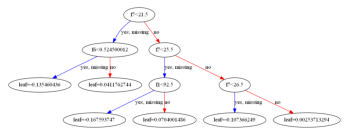

In [12]:
plot_tree(model, num_trees=99)

[18:01:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


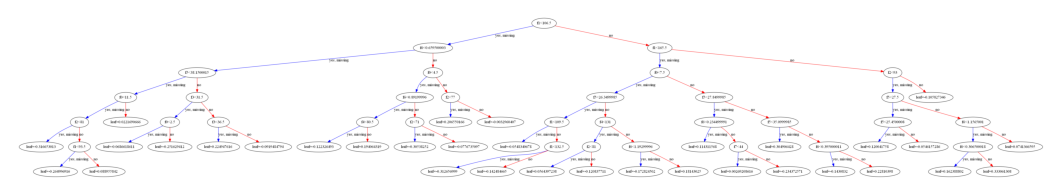

In [6]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
# load data
dataset = loadtxt('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
y = dataset[:,8]
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot single tree
fig = plt.figure(dpi=180)
ax = plt.subplot(1,1,1)
plot_tree(model, num_trees=4, ax = ax)

plt.tight_layout()
plt.savefig("tree_structure.pdf")
plt.show()

In [7]:
import pandas as pd
 
# dictionary with list object in values
details = {
    'Name' : ['Ankit', 'Aishwarya', 'Shaurya', 'Shivangi'],
    'Age' : [23, 21, 22, 21],
    'University' : ['BHU', 'JNU', 'DU', 'BHU'],
}
 
# creating a Dataframe object
df = pd.DataFrame(details, columns = ['Name', 'Age', 'University'],
                  index = ['a', 'b', 'c', 'd'])
 
# return a new dataframe by dropping a row
# 'b' & 'c' from dataframe using their
# respective index position
update_df = df.drop([df.index[1], df.index[2]])
 
print(update_df)
print(df)

data = data.drop(data.index[[1, 9, 29]])
data = data.drop(data.index[range(5)])

df.drop(df.index[2:4])

       Name  Age University
a     Ankit   23        BHU
d  Shivangi   21        BHU
        Name  Age University
a      Ankit   23        BHU
b  Aishwarya   21        JNU
c    Shaurya   22         DU
d   Shivangi   21        BHU


In [14]:
#model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)


Best Score: -10.263044720134683
Best Hyperparameters: {'eta': 0.1, 'max_depth': 1, 'n_estimators': 100, 'subsample': 1}


In [30]:
# initializing dictionary
test_dict = {'Gfg' : 1, 'is' : 2, 'best' : 3}
  
# printing original dictionary
print("The original dictionary is : " + str(test_dict))
  
# Using keys() + list()
# Getting first key in dictionary
res = list(test_dict.keys())[0]
firstkey = list(test_dict.keys())
firstitem = list(test_dict.items())
print(firstvalue)
print(firstitem)
# printing initial key
print("The first key of dictionary is : " + str(res))

13.207176232845873


In [27]:
  # Dictionary of string and int
word_freq = {
    'Hello' : 56,
    "at"    : 23,
    'test'  : 43,
    'This'  : 78,
    'Why'   : 11
}
# Get first value of dictionary
first_value = list(word_freq.items())[0][1]
print('First Value: ', first_value)
list(word_freq.items())

First Value:  56


[('Hello', 56), ('at', 23), ('test', 43), ('This', 78), ('Why', 11)]

In [28]:
word_freq["at"]

23